<a href="https://colab.research.google.com/github/gBmoN/Image_Classification/blob/main/ClassificationImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from tensorflow.keras import datasets, layers, models

In [38]:
!git clone https://github.com/gBmoN/Image_Classification.git

fatal: destination path 'Image_Classification' already exists and is not an empty directory.


In [39]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [40]:
training_images, testing_images = training_images / 255, testing_images / 255

In [41]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

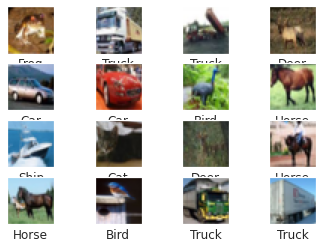

In [42]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [43]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

model.save('image_classifiers.model')

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 1.7413 - accuracy: 0.3585 - val_loss: 1.4536 - val_accuracy: 0.4602
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 1.3755 - accuracy: 0.5081 - val_loss: 1.2714 - val_accuracy: 0.5445
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 1.2016 - accuracy: 0.5725 - val_loss: 1.2188 - val_accuracy: 0.5615
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 1.0857 - accuracy: 0.6181 - val_loss: 1.1029 - val_accuracy: 0.6070
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.9945 - accuracy: 0.6532 - val_loss: 1.1242 - val_accuracy: 0.6012
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.9158 - accuracy: 0.6789 - val_loss: 1.0798 - val_accuracy: 0.6205
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8598 - accuracy: 0.6985 - val_loss: 1.0780 - val_accuracy: 0.6277
Epoch 

In [45]:
model = models.load_model('image_classifiers.model')

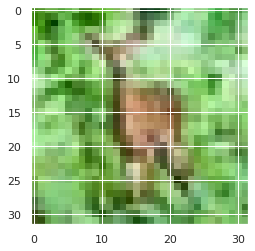

In [46]:
img = cv.imread('/content/Image_Classification/resized images/4.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)


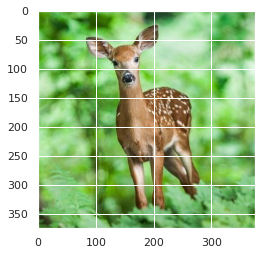

In [47]:
normal_img = cv.imread('/content/Image_Classification/nomal images/4.jpg')
normal_img = cv.cvtColor(normal_img, cv.COLOR_BGR2RGB)

plt.imshow(normal_img, cmap=plt.cm.binary)

In [48]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is: {class_names[index]}')

Prediction is: Deer
